## Data Source: https://www.kaggle.com/datasets/neuromusic/avocado-prices


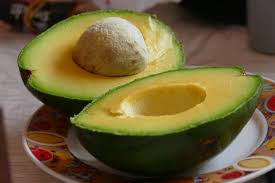

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

In [ ]:
#pip install prophet

In [ ]:
avo=pd.read_csv("/content/avocado.csv")
avo.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [ ]:
avo=avo.dropna()

In [ ]:
avo.isna().sum()

,0
Unnamed: 0,0
Date,0
AveragePrice,0
Total Volume,0
4046,0
4225,0
4770,0
Total Bags,0
Small Bags,0
Large Bags,0


In [ ]:
avo=avo.sort_values("Date")
avo

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
363,51,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015.0,California
2079,51,2015-01-04,1.13,109215.00,48285.15,37562.78,34.10,23332.97,21582.97,1750.00,0.00,conventional,2015.0,Roanoke
675,51,2015-01-04,0.99,668086.00,117454.09,429518.41,5553.60,115559.90,67894.33,47661.52,4.05,conventional,2015.0,Denver
2027,51,2015-01-04,1.13,182697.97,56293.75,80396.09,9762.41,36245.72,31778.36,4467.36,0.00,conventional,2015.0,RichmondNorfolk
2131,51,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015.0,Sacramento
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8610,0,2018-03-25,0.73,1803351.21,788734.28,219585.81,6423.31,788607.81,673212.32,94356.41,21039.08,conventional,2018.0,DallasFtWorth
8490,0,2018-03-25,1.04,624645.42,281209.40,33187.58,1831.33,308417.11,227944.75,77406.46,3065.90,conventional,2018.0,Atlanta
8766,0,2018-03-25,1.37,698961.15,474642.82,53923.97,2049.21,168345.15,106478.51,61776.64,90.00,conventional,2018.0,MiamiFtLauderdale
8478,0,2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,2018.0,Albany


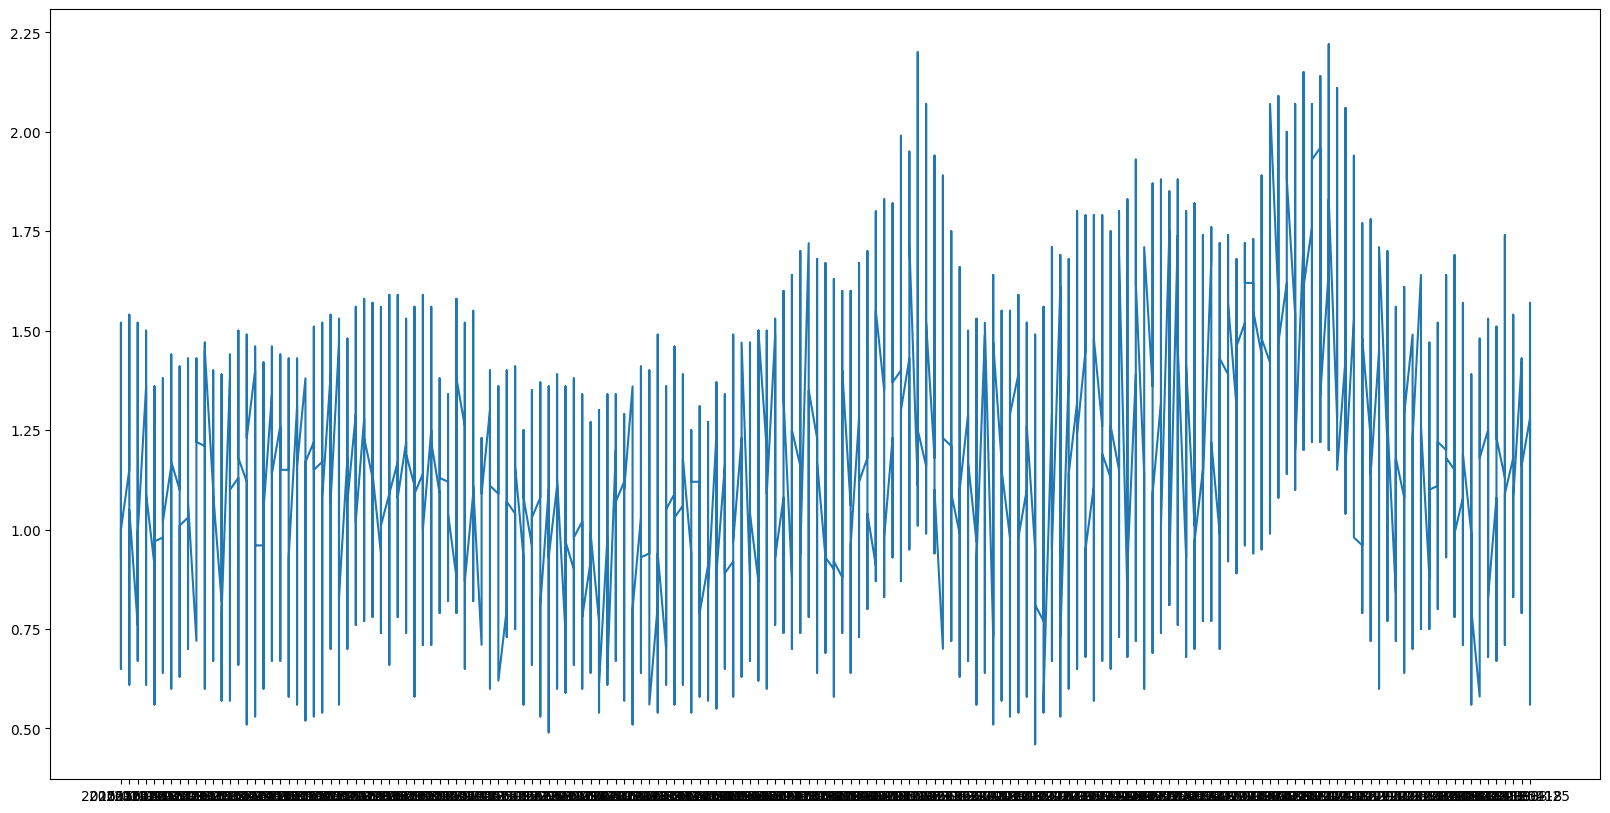

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(avo['Date'],avo['AveragePrice'])

<Axes: xlabel='year', ylabel='count'>

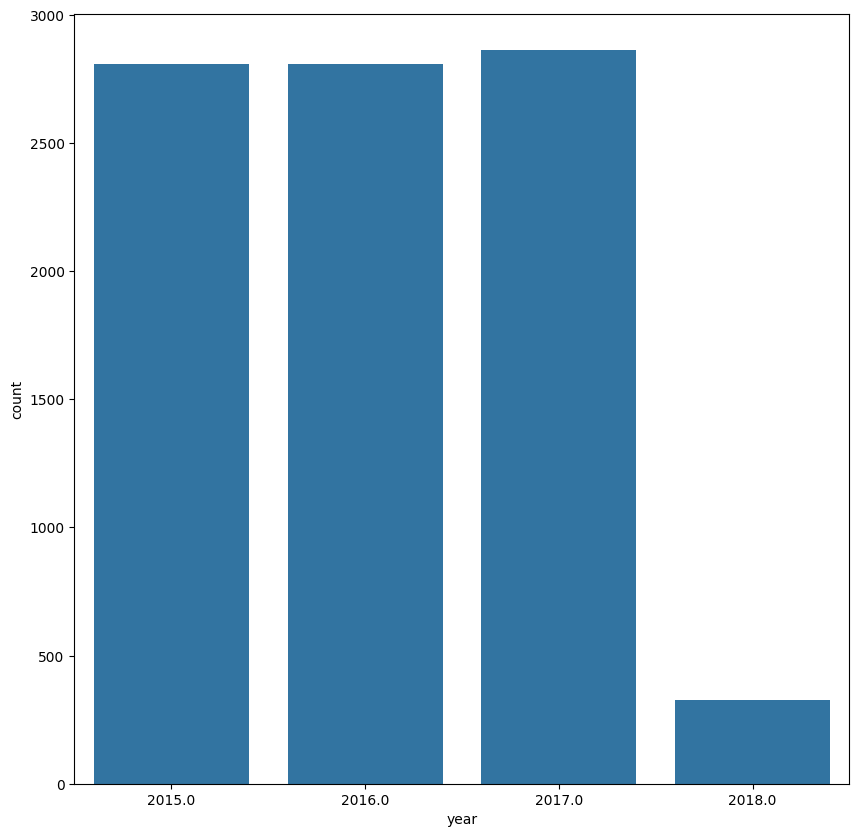

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x='year',data=avo)

In [ ]:
avo_prophet=avo[['Date','AveragePrice']]
avo_prophet

,Date,AveragePrice
363,2015-01-04,0.93
2079,2015-01-04,1.13
675,2015-01-04,0.99
2027,2015-01-04,1.13
2131,2015-01-04,1.05
...,...,...
8610,2018-03-25,0.73
8490,2018-03-25,1.04
8766,2018-03-25,1.37
8478,2018-03-25,1.57


In [ ]:
avo_prophet.columns=['ds','y']
model=Prophet()
model.fit(avo_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7x3kpgy4/y9fzs3z7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7x3kpgy4/lfhvuc9y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33162', 'data', 'file=/tmp/tmp7x3kpgy4/y9fzs3z7.json', 'init=/tmp/tmp7x3kpgy4/lfhvuc9y.json', 'output', 'file=/tmp/tmp7x3kpgy4/prophet_model7h14xout/prophet_model-20250727160706.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:07:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:07:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=365)
future.tail()

,ds
529,2019-03-21
530,2019-03-22
531,2019-03-23
532,2019-03-24
533,2019-03-25


In [ ]:
forecast=model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
529,2019-03-21,1.033744,0.573269,1.552327
530,2019-03-22,1.034331,0.567629,1.507574
531,2019-03-23,1.035312,0.577432,1.560852
532,2019-03-24,1.036677,0.579288,1.525593
533,2019-03-25,1.038402,0.573373,1.546769


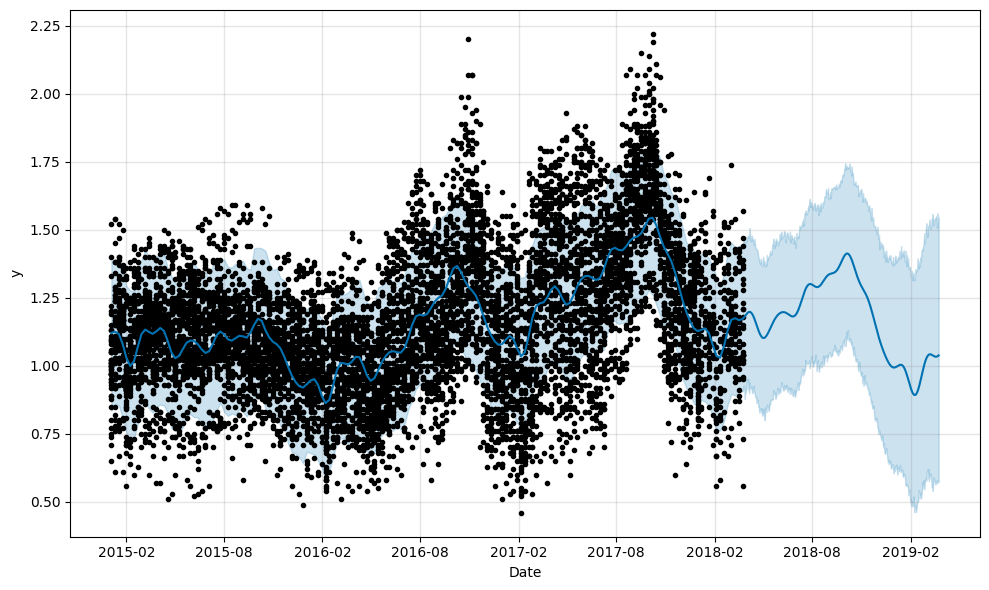

In [ ]:
fig_forecast=model.plot(forecast,xlabel='Date',ylabel='y')

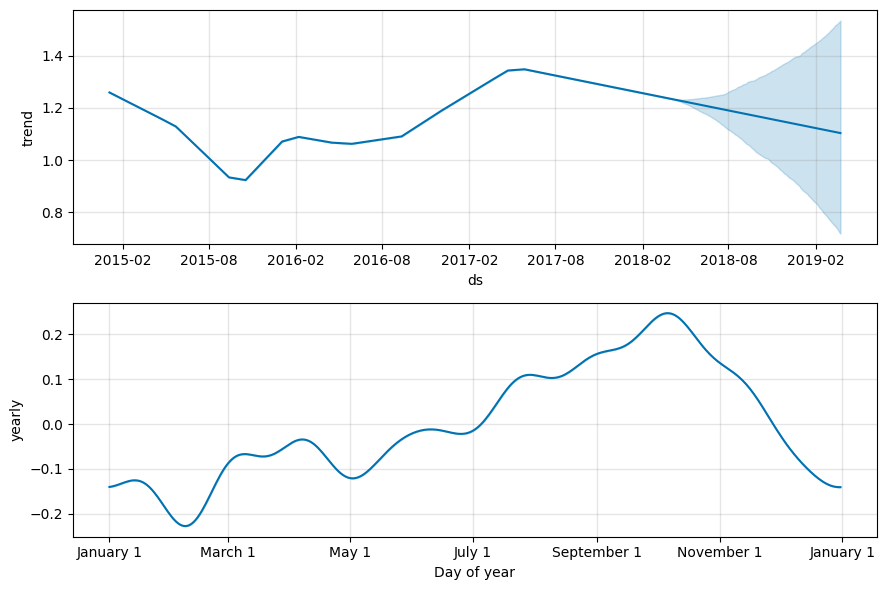

In [ ]:
fig_com=model.plot_components(forecast)